In [1]:
# indicadores de desempenho de computadores
# inputs: memória disponível e uso de CPU - calcula um indicador

In [2]:
# medição da memória disponível da máquina constantemente assim como
# o percentual de utilização do CPU do computador

In [ ]:
# Se MemDisp for alta E UsoCPU for baixo ENTÃO KPI é baixo
# Se MemDisp for média E UsoCPU for médio ENTÃO KPI é alto
# Se MemDisp for baixa E UsoCPU for alto ENTÃO KPI é baixo

In [29]:
%pylab inline
import numpy as np
import skfuzzy as fuzz
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [30]:
# Entradas
mem = np.arange(0,101,1)
cpu = np.arange(0,101,1)
# Indicador de desempenho
kpi = np.arange(0,101,1)

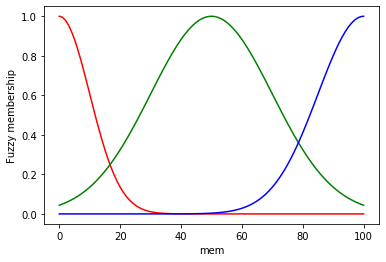

In [31]:
# Função de pertinência - Free Memory
mem_L = fuzz.gaussmf(mem,0,10)
mem_A = fuzz.gaussmf(mem,50,20)
mem_H = fuzz.gaussmf(mem,100,15)
fig, ax = plt.subplots()
ax.plot(mem,mem_L,'r',mem,mem_A,'g',mem,mem_H,'b')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('mem')
ax.set_ylim(-0.05,1.05);

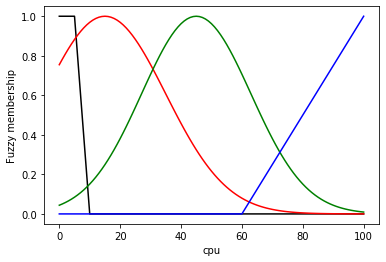

In [32]:
# Função de pertinência - CPU
cpu_LL = fuzz.trapmf(cpu , [0, 0, 5, 10])
cpu_L = fuzz.gaussmf(cpu, 15, 20)
cpu_A = fuzz.gaussmf(cpu, 45, 18)
cpu_H = fuzz.trimf(kpi , [60, 100, 100])
fig, ax = plt.subplots()
ax.plot(cpu,cpu_LL,'k',cpu,cpu_L,'r',cpu,cpu_A,'g', cpu, cpu_H,'b')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('cpu')
ax.set_ylim(-0.05,1.05);

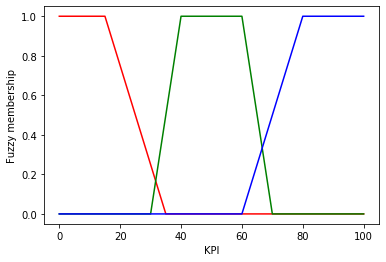

In [33]:
# KPI
kpi_L = fuzz.trapmf(kpi,[0,0,15,35])
kpi_A = fuzz.trapmf(kpi,[30,40,60,70])
kpi_H = fuzz.trapmf(kpi,[60,80,100,1000])
fig, ax = plt.subplots()
ax.plot(kpi,kpi_L,'r',kpi,kpi_A,'g',kpi,kpi_H,'b')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('KPI')
ax.set_ylim(-0.05,1.05);

# Obs.: As regiões Fuzzy serão resolvidas quando aplicadas as modelagens

In [37]:
def aggMemberFunc(memVal,cpuVal,mem,cpu,kpi,mem_L,mem_A,mem_H,cpu_LL,cpu_L,cpu_A,cpu_H,kpi_L,kpi_A,kpi_H):
# Interpola as variáveis
    mem1 = fuzz.interp_membership(mem, mem_L, memVal)
    mem2 = fuzz.interp_membership(mem, mem_A, memVal)
    mem3 = fuzz.interp_membership(mem, mem_H, memVal)
    cpu0 = fuzz.interp_membership(cpu, cpu_LL, cpuVal)
    cpu1 = fuzz.interp_membership(cpu, cpu_L, cpuVal)
    cpu2 = fuzz.interp_membership(cpu, cpu_A, cpuVal)
    cpu3 = fuzz.interp_membership(cpu, cpu_H, cpuVal)
    
    # Determina os pesos para cada antecedente
    rule0 = np.fmax(mem3,cpu0) # 0 - muita mem disp e muito pouco uso cpu
    rule1 = np.fmax(mem1,cpu3) # 1 - pouca mem disp e muito uso cpu
    rule2 = np.fmax(mem2,cpu1) # 2 - media mem disp e pouco uso cpu
    rule3 = np.fmax(mem2,cpu2) # 3 - media mem disp e medio uso cpu
    rule4 = np.fmax(mem3,cpu3) # 4 - muita mem disp e muito uso cpu
    
    # Determina os valores de cada relação de KPI
    kpi0 = rule0 * kpi_L
    kpi1 = rule1 * kpi_L
    kpi2 = rule2 * kpi_A
    kpi3 = rule3 * kpi_H
    kpi4 = rule4 * kpi_L
    
    # Determina a função agregada
    aggregate_membership = np.fmax(kpi0, np.fmax(kpi1, np.fmax(kpi2, np.fmax(kpi3, kpi4))))
    return aggregate_membership

In [38]:
mList = np.arange(0,105,5)
cList = np.arange(0,105,5)
kList = np.zeros((len(mList),len(cList)))
for i in range(len(mList)):
    for j in range(len(cList)):
        agFunc = aggMemberFunc(mList[i],cList[j],mem,cpu,kpi,mem_L,mem_A,mem_H,cpu_LL,cpu_L,cpu_A,cpu_H,kpi_L,kpi_A,kpi_H)
        kList[i,j] = fuzz.defuzz(kpi,agFunc,'centroid')

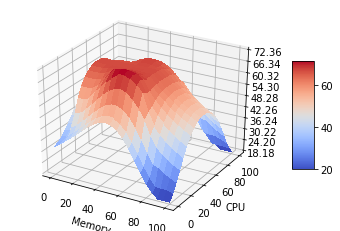

In [39]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = mList
Y = cList
X, Y = np.meshgrid(X,Y)
Z = np.array(kList)
surf = ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax.set_xlabel('Memory')
ax.set_ylabel('CPU')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.colorbar(surf,shrink=0.5,aspect=5)